# if문, for문 

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="4em" style="font-weight:bold;color:#3f8dbf;">미션</font><br>
1. data/image 폴더에 있는 모든 이미지를 읽는다.-os 모듈<br>
2. 모든 이미지의 속성(파일명,가로크기,세로크기,모드)를 csv파일로 저장한다.-pandas 모듈<br>
3. 모든 이미지에 엣지필터를 적용하여 이미지 종류별 폴더에 각각 저장한다.-Pillow 모듈,os모듈<br>
   예) 강아지1.jpg  -> 강아지\edge강아지1.jpg, 고양이1.jpg  -> 고양이\edge고양이.jpg
</div>


### 1. os 모듈 참고 자료: https://www.crocus.co.kr/927
* 파일명 가져오기 : os.listdir(폴더경로)
* 폴더 생성:os.mkdir(폴더명)

### 문자열 인코딩 참고자료: https://onlywis.tistory.com/2

### 2. Pillow 이미지 파일 정보 속성 확인: https://ddolcat.tistory.com/690
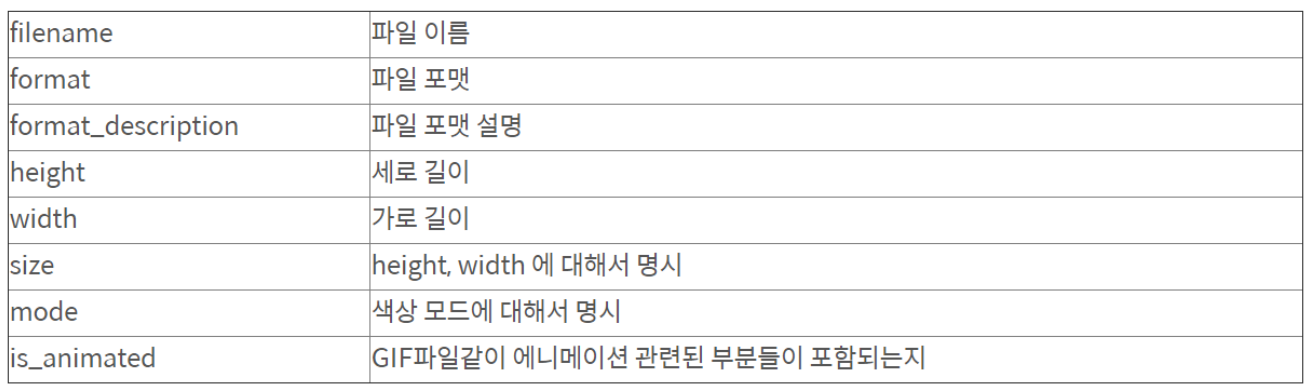


### 이미지 오픈하고 나타내기, 이미지 정보 확인하기

In [4]:
import os
from PIL import Image
import pandas as pd



img = Image.open("./images/강아지1.jpg")
print(type(img))

img.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [5]:
print(f'이미지 파일 이름 : {img.filename}')
print(f'이미지 파일형식(format) : {img.format}')
print(f'이미지 용량(size) : {img.size}')
print(f'이미지 색상모드 : {img.mode}')
print(f'이미지 width : {img.width}')
print(f'이미지 height : {img.height}') 

이미지 파일 이름 : ./images/강아지1.jpg
이미지 파일형식(format) : JPEG
이미지 용량(size) : (377, 400)
이미지 색상모드 : RGB
이미지 width : 377
이미지 height : 400


## [미션1]모든 이미지 속성을 csv로 저장하기

In [6]:
import pandas as pd
from PIL import Image
import os

In [21]:
path='./images/'
files=os.listdir(path)
i_data=[]
for f in files:
    img = Image.open(path+f)
    i_data.append([img.filename,img.format,img.size,img.mode,img.width,img.height])

#i_data 판다스 DataFrame으로 바꾸기
df=pd.DataFrame(i_data,columns=['파일이름','형식','용량','색상모드','너비','높이'])

#df를 csv로 저장하기
df.to_csv('image정보.csv', encoding='cp949')

## 이미지에 filter 적용하여 나타내기 : https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html

In [79]:
from PIL import ImageFilter
im=Image.open(df['파일이름'][0])
im1 = im.filter(ImageFilter.FIND_EDGES)
im1.show()

# [미션2] 엣지 필터 지정후 이미지 종류별 각 폴더에 저장하기

### 정규표현식 : https://software-creator.tistory.com/32
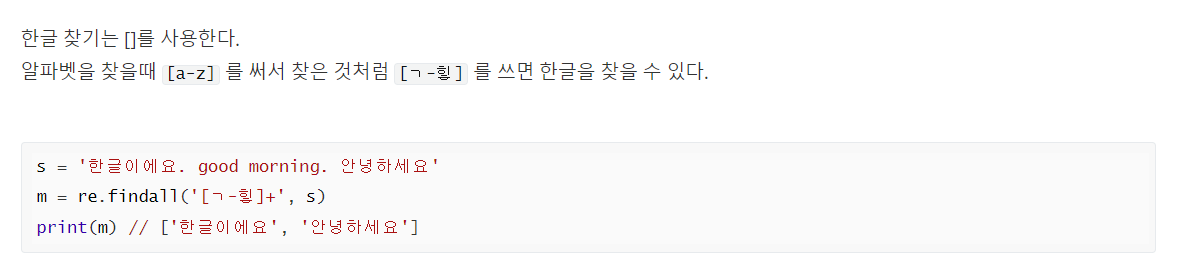

In [97]:
#폴더 생성
import re

fold_n=[]
for f in df['파일이름']:
    fold_n.append(re.findall('[가-힣]+',f)[0])
    
fold_n=list(set(fold_n))
path='./images/'  # re.findall('[./a-z/]+','./images/강아지1.jpg')[0]
for i in fold_n:
    os.mkdir(path+i)

In [98]:
# 종류별 엣지 적용후 각 폴더에 저장하기
for f in df['파일이름']:
    im=Image.open(f)
    im1 = im.filter(ImageFilter.FIND_EDGES)
    file_name='/'+f.split('/')[-1]
    for i in fold_n:
        if i in f:
            im1.save(path+i+file_name)
            
